# Yandex.Afisha. Optimizing marketing expenses

The project is about an internship in the analytical department at Yandex.Afisha. Our task is to help optimize marketing expenses.

The info provided: 

- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018

- Dump file with all orders for the period

- Marketing expenses statistics

We need to study:
- How people use the product

- When they start to buy

- How much money each customer brings

- When they pay of

## Download the data and prepare it for analysis


In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
# Load the data
try:
    visits = pd.read_csv('visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
try:
    orders = pd.read_csv('orders_log_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
try:
    costs = pd.read_csv('costs_us.csv')
except:
    costs = pd.read_csv('/datasets/costs_us.csv')    

# Description of the data

The `visits` table (server logs with data on website visits):

- **Uid**— user's unique identifier

- **Device** — user's device

- **Start Ts** — session start date and time

- **End Ts** — session end date and time

- **Source Id** — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The `orders` table (data on orders):

- **Uid** — unique identifier of the user making an order

- **Buy Ts** — order date and time

- **Revenue** — Yandex.Afisha's revenue from the order

The `costs` table (data on marketing expenses):

- **source_id** — ad source identifier

- **dt** — date

- **costs**  — expenses on this ad source on this day

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [5]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [9]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [10]:
# Let's check if there is any duplicates in data
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


No missing values and duplicates were identified.

# Get info on data
There a couple of issues indetified with the data:
- Upper cases in column names in 'visits' and 'orders' frames - we should change it to lowercase (and remove spaces also)
- Dates are in 'object' type in all columns - let's change the format to 'datetime'


In [11]:
#renaming columns
visits.columns= visits.columns.str.lower()
orders.columns= orders.columns.str.lower()

visits.columns=visits.columns.str.replace(' ','_')
orders.columns=orders.columns.str.replace(' ','_')

In [12]:
#changing the format
visits['start_ts'] = visits['start_ts'].astype('datetime64[ns]')
visits['end_ts'] = visits['end_ts'].astype('datetime64[ns]')
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[ns]')
costs['dt'] = costs['dt'].astype('datetime64[ns]')
visits['device'] = visits['device'] .astype('category')

In [13]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


## Make reports and calculate metrics

# 2.1. Product

**Let's calculate how many people use Yandex.Afisha every day, week, and month**

In [14]:
visits['date_start_ts'] = pd.to_datetime(visits['start_ts']).dt.normalize()

visits['visit_month'] = visits['start_ts'].astype('datetime64[M]').dt.normalize()

In [15]:
#Let's group the data by the 'uid' column using the groupby() method. For each user, get the date of their first session

first_visit_date_by_users = visits.groupby('uid')[
    'date_start_ts'
].min()

first_visit_date_by_users.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-06
297729379853735   2017-06-07
313578113262317   2017-09-18
325320750514679   2017-09-30
Name: date_start_ts, dtype: datetime64[ns]

In [16]:
#To avoid having two columns with the same name in the resulting DataFrame, we'll rename the Series object
first_visit_date_by_users.name = 'first_visit_date'

In [17]:
visits = visits.join(first_visit_date_by_users,on='uid')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  category      
 1   end_ts            359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   start_ts          359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
 5   date_start_ts     359400 non-null  datetime64[ns]
 6   visit_month       359400 non-null  datetime64[ns]
 7   first_visit_date  359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), int64(1), uint64(1)
memory usage: 19.5 MB


In [18]:
visits['visit_week'] = pd.to_datetime(visits['date_start_ts'], unit='d') - pd.to_timedelta(visits['date_start_ts'].dt.dayofweek, unit='d') 

In [19]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-20,2017-12-18
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-06-26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-27,2017-12-25


In [20]:
#The data are from June 2017 through May 2018 - so we can group them by number of week and month respectively

users_count_daily = visits.groupby('date_start_ts').agg({'uid': 'nunique'})
users_count_weekly = visits.groupby('visit_week').agg({'uid': 'nunique'})
users_count_monthly = visits.groupby('visit_month').agg({'uid': 'nunique'})

average_users_daily = users_count_daily['uid'].mean()
average_users_weekly = users_count_weekly['uid'].mean()
average_users_monthly = users_count_monthly['uid'].mean()

print('Average daily visits:', average_users_daily)
print('Average weekly visits:', average_users_weekly)
print('Average monthly visits:', average_users_monthly)

Average daily visits: 907.9917582417582
Average weekly visits: 5716.245283018868
Average monthly visits: 23228.416666666668


Text(0, 0.5, 'Amount of visits')

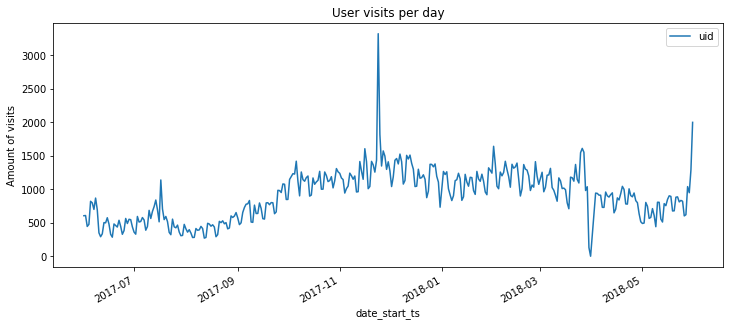

In [21]:
users_count_daily.plot.line(figsize=(12,5))
plt.title('User visits per day')
plt.ylabel('Amount of visits')

We can see at the graph the gradual increase of daily visits with a huge jump at the end of November 2017 and further almost stable amount of visits around it's average.

Text(0, 0.5, 'Amount of visits')

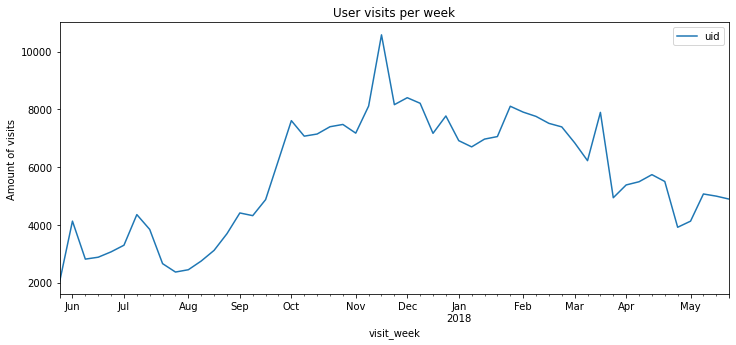

In [22]:
users_count_weekly.plot.line(figsize=(12,5))
plt.title('User visits per week')
plt.ylabel('Amount of visits')

Monthly graph is similar to the daily one with slightly more visible rises and falls.

In [23]:
users_count_monthly.head()

,uid
visit_month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692


Text(0, 0.5, 'Amount of visits')

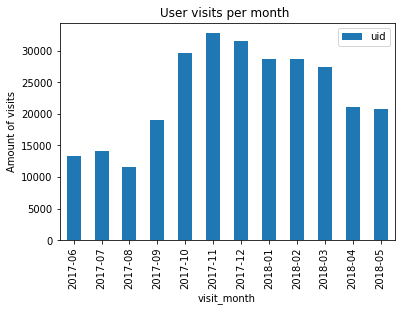

In [24]:
users_count_monthly.index = users_count_monthly.index.strftime('%Y-%m')
users_count_monthly.plot(kind='bar')
plt.title('User visits per month ')
plt.ylabel('Amount of visits')

As at the previous graph the highest amount of visits took place in November 2017 and decreased significantly by the end of the period.

**Next step it to check how many sessions are there per day. (One user might have more than one session.)**

In [25]:
sessions_count_daily = visits.groupby('date_start_ts').agg({'uid': 'count'})
average_sessions_daily = sessions_count_daily['uid'].mean()
print('Average daily sessions:', average_sessions_daily)

Average daily sessions: 987.3626373626373


Text(0, 0.5, 'Amount of sessions')

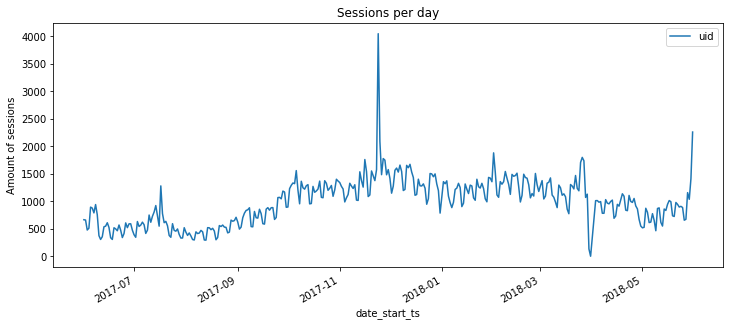

In [26]:
sessions_count_daily.plot.line(figsize=(12,5))
plt.title('Sessions per day')
plt.ylabel('Amount of sessions')

The graph is similar to the one for DAU plt above.

In [27]:
sessions_count_daily_by_device = visits.pivot_table(
    index='date_start_ts',
    columns='device',
    values='uid',
    aggfunc='count')

sessions_count_daily_by_device.head()

device,desktop,touch
date_start_ts,,
2017-06-01,501,163
2017-06-02,498,160
2017-06-03,329,148
2017-06-04,349,161
2017-06-05,693,200


In [28]:
average_sessions_daily = sessions_count_daily_by_device[['desktop','touch']].mean()
print(average_sessions_daily)

device
desktop    721.337912
touch      266.024725
dtype: float64


Text(0, 0.5, 'Amount of sessions')

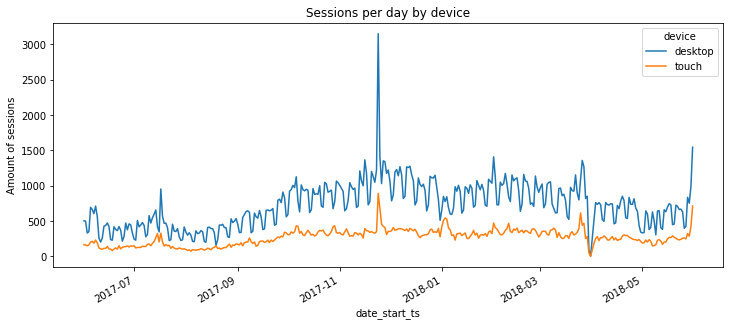

In [29]:
sessions_count_daily_by_device.plot.line(figsize=(12,5))
plt.title('Sessions per day by device')
plt.ylabel('Amount of sessions')

It seems that desktop visits dominate a lot in compare to touch.

**Let's find out what is the length of each session.**

If there are just as many people who spend a lot of time for the application as there are those who only occasionally use it, then the mean would be all we need. But if some users are outliers who use the application for several hours, their data will raise the average significantly. That's why the median can also be useful for estimating the preferences of users whose behavior varies. 

The median splits a sample into two equal parts: one part will have values smaller than the median, and the other will have values greater than the median. Median helps to assess the most typical session lenght in our data.

Let's calculate both of them.

In [30]:
visits['session_lenght'] = (visits['end_ts']-visits['start_ts'])/np.timedelta64(1, 'm')
average_session_lenght = visits['session_lenght'].mean()

#Calculating average session not equal to zero lengt
no_zero_session = visits.query('session_lenght > 0')
average_no_zero_session_lenght = no_zero_session['session_lenght'].mean()
print('Average session lenght:', average_session_lenght, 'minutes')
print('Average session lenght (excluding those equal to zero):', average_no_zero_session_lenght, 'minutes')


Average session lenght: 10.717094787608978 minutes
Average session lenght (excluding those equal to zero): 11.90282526379979 minutes


In [31]:
median_session_lenght = visits['session_lenght'].median()
median_no_zero_session_lenght = no_zero_session['session_lenght'].median()
print('Median session lenght:', median_session_lenght, 'minutes')
print('Median session lenght (excluding those equal to zero):', median_no_zero_session_lenght, 'minutes')

Median session lenght: 5.0 minutes
Median session lenght (excluding those equal to zero): 6.0 minutes


Median is more robastic in compare to mean value - in general average session will last about 5 minutes.

Let's also calulate mode to assess the most often session lenght in our dataset:

In [32]:
mode_session_lenght = visits['session_lenght'].mode()
mode_session_lenght

0    1.0
dtype: float64

As we can see from mode value, the most popular session lenght is 1 minute. 

In [33]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-20,2017-12-18,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19,2018-02-19,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-06-26,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-27,2017-12-25,0.0


Text(0, 0.5, 'Session lengt in minutes')

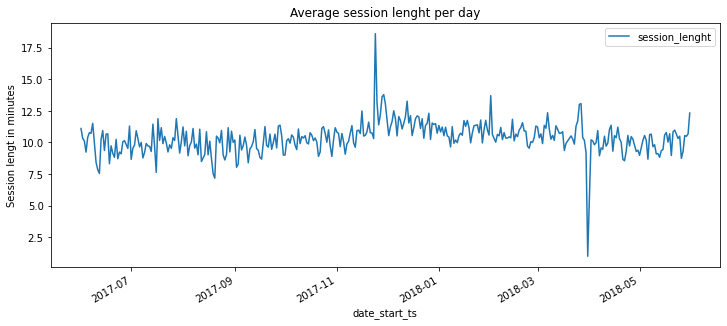

In [34]:
lenght_graph = visits[['session_lenght', 'date_start_ts' ]]
average_lenght_daily = lenght_graph.groupby('date_start_ts').agg({'session_lenght': 'mean'})
average_lenght_daily.plot.line(figsize=(12,5))
plt.title('Average session lenght per day')
plt.ylabel('Session lengt in minutes')

Again, the session lenght by date corresponds to visits amount graph we prepared before.

**Next step is to identify what's the user retention rate.**

In [35]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [36]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-20,2017-12-18,18.0,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19,2018-02-19,28.0,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-06-26,0.0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14,24.0,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-27,2017-12-25,0.0,2017-12-01


Now we can calculate user lifetime within the cohort for each row of the DataFrame

In [37]:
visits['cohort_lifetime'] = (
    visits['visit_month'] - visits['first_visit_month']
)
visits['cohort_lifetime'] = visits[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round()
 

In [38]:
visits.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-20,2017-12-18,18.0,2017-12-01,0.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19,2018-02-19,28.0,2018-02-01,0.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-06-26,0.0,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14,24.0,2018-03-01,2.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-27,2017-12-25,0.0,2017-12-01,0.0


Let's group the data by cohort and lifetime and find the number of active users at a certain lifetime week for each cohort

In [39]:
cohorts = (
    visits.groupby(['first_visit_month', 'cohort_lifetime'])
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0.0,13259
1,2017-06-01,1.0,1043
2,2017-06-01,2.0,713
3,2017-06-01,3.0,814
4,2017-06-01,4.0,909


In [40]:
#Finding the initial number of users in the cohort by looking at the 0th week:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_users_count.head()

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [41]:
#Renaming 'uid' column to 'cohort_users'
initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)
initial_users_count.head()

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Let's join the data on cohorts with the initial number of users in the cohort

In [42]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')

In [43]:
#Calculating the retention rate
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 
cohorts.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0.0,13259,13259,1.000000
1,2017-06-01,1.0,1043,13259,0.078664
2,2017-06-01,2.0,713,13259,0.053775
3,2017-06-01,3.0,814,13259,0.061392
4,2017-06-01,4.0,909,13259,0.068557


In [44]:
cohorts_for_pivot = cohorts[['first_visit_month','cohort_lifetime','retention']]

In [45]:
#Compiling a pivot table and make a heatmap:

retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')
retention_pivot.fillna('')

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02-01,1.0,0.05708,0.025454,0.020093,,,,,,,,


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

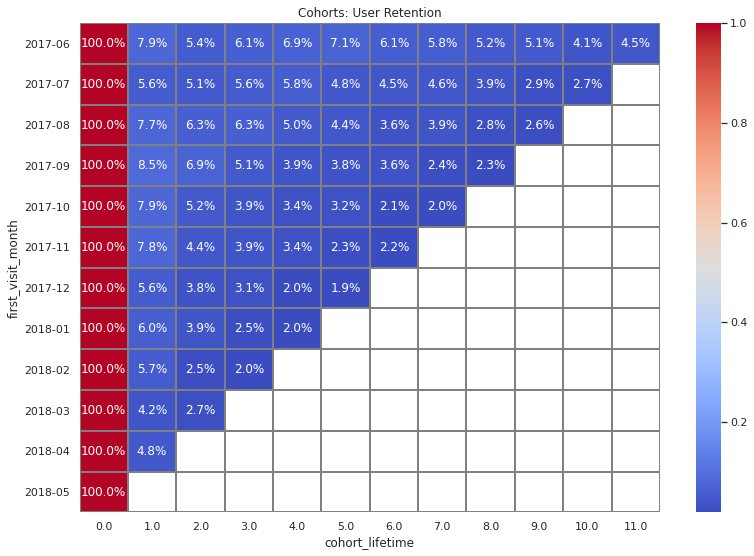

In [46]:
retention_pivot.index = retention_pivot.index.strftime('%Y-%m')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'coolwarm'
) 


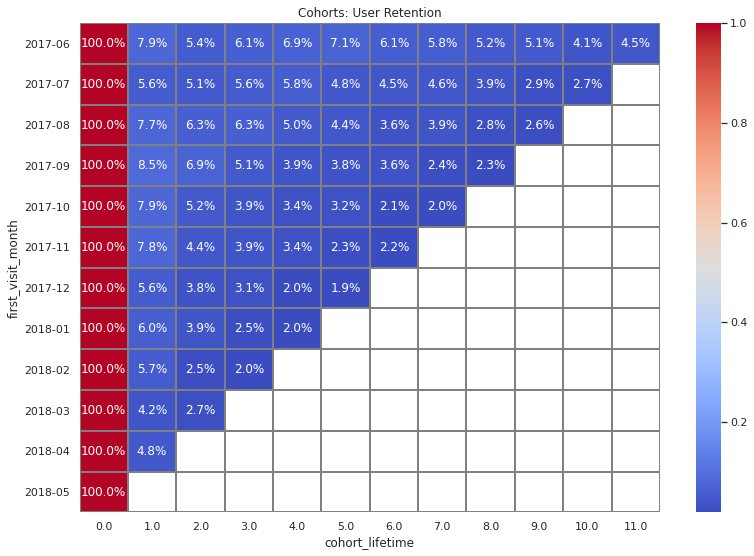

In [47]:
# the reviewer's cell:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'coolwarm'
) 
plt.show()

User behavior is changing with every new cohort. For some of the cohorts the retention rate decreases after 1st week. For some of them not (for example, for 1st, 2nd, 7th cohorts the initial retention rate is less than some of the following of them).

**Intermediate conclusion**

We have calculated main measures of central tendency for our dataset and prepared several plots to assess average session lenght as well as amount if visits on daily, weekly and monthly basis. 

We can conclude that in general amount of visits stay stable during the year but retention rate is quite low. 

Let's make additional calculation to look deeper in our data.


# 2.2. Sales

**Let's see when do people start buying. To do this we need to find the date of first visit and the date of first order**

In [48]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts']).dt.normalize()

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [50]:
first_order_date_by_users = orders.groupby('uid')['buy_ts'].min()
first_order_date_by_users.head()

uid
313578113262317    2018-01-03
1575281904278712   2017-06-03
2429014661409475   2017-10-11
2464366381792757   2018-01-28
2551852515556206   2017-11-24
Name: buy_ts, dtype: datetime64[ns]

In [51]:
first_order_date_by_users.name = 'first_order_date'

In [52]:
visits_orders = visits.join(first_order_date_by_users,on='uid')
visits_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   device             359400 non-null  category      
 1   end_ts             359400 non-null  datetime64[ns]
 2   source_id          359400 non-null  int64         
 3   start_ts           359400 non-null  datetime64[ns]
 4   uid                359400 non-null  uint64        
 5   date_start_ts      359400 non-null  datetime64[ns]
 6   visit_month        359400 non-null  datetime64[ns]
 7   first_visit_date   359400 non-null  datetime64[ns]
 8   visit_week         359400 non-null  datetime64[ns]
 9   session_lenght     359400 non-null  float64       
 10  first_visit_month  359400 non-null  datetime64[ns]
 11  cohort_lifetime    359400 non-null  float64       
 12  first_order_date   97394 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](8), float64(2

In [53]:
visits_orders.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght,first_visit_month,cohort_lifetime,first_order_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-20,2017-12-18,18.0,2017-12-01,0.0,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19,2018-02-19,28.0,2018-02-01,0.0,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-07-01,2017-06-26,0.0,2017-07-01,0.0,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14,24.0,2018-03-01,2.0,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,2017-12-27,2017-12-25,0.0,2017-12-01,0.0,NaT


In [54]:
maded_orders = visits_orders.query('first_order_date == first_order_date')
maded_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97394 entries, 3 to 359399
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   device             97394 non-null  category      
 1   end_ts             97394 non-null  datetime64[ns]
 2   source_id          97394 non-null  int64         
 3   start_ts           97394 non-null  datetime64[ns]
 4   uid                97394 non-null  uint64        
 5   date_start_ts      97394 non-null  datetime64[ns]
 6   visit_month        97394 non-null  datetime64[ns]
 7   first_visit_date   97394 non-null  datetime64[ns]
 8   visit_week         97394 non-null  datetime64[ns]
 9   session_lenght     97394 non-null  float64       
 10  first_visit_month  97394 non-null  datetime64[ns]
 11  cohort_lifetime    97394 non-null  float64       
 12  first_order_date   97394 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](8), float64(2), int64(1), uin

In [55]:
maded_orders['time_to_first_order'] =  maded_orders['first_order_date'] - maded_orders['first_visit_date']
maded_orders['time_to_first_order'] = maded_orders['time_to_first_order'] / np.timedelta64(1, 'D')


/tmp/ipykernel_64/2355794200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maded_orders['time_to_first_order'] =  maded_orders['first_order_date'] - maded_orders['first_visit_date']
/tmp/ipykernel_64/2355794200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maded_orders['time_to_first_order'] = maded_orders['time_to_first_order'] / np.timedelta64(1, 'D')


In [56]:
maded_orders.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght,first_visit_month,cohort_lifetime,first_order_date,time_to_first_order
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,2018-03-09,2018-05-14,24.0,2018-03-01,2.0,2018-03-09,0.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-09-01,2017-09-03,2017-08-28,1.0,2017-09-01,0.0,2017-09-04,1.0
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-02-06,2018-02-01,2017-06-04,2018-02-05,5.0,2017-06-01,8.0,2017-06-25,21.0
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-12,2018-02-01,2018-02-10,2018-02-12,66.0,2018-02-01,0.0,2018-02-12,2.0
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017-12-05,2017-12-01,2017-09-23,2017-12-04,7.0,2017-09-01,3.0,2017-09-27,4.0


In [57]:
orders_pivot = maded_orders.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='time_to_first_order',
    aggfunc='mean').round()
orders_pivot.fillna('')

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_visit_month,,,,,,,,,,,,
2017-06-01,43.0,50.0,56.0,58.0,63.0,75.0,72.0,70.0,87.0,94.0,101.0,107.0
2017-07-01,35.0,48.0,59.0,71.0,82.0,92.0,92.0,103.0,106.0,105.0,115.0,
2017-08-01,31.0,38.0,55.0,72.0,76.0,82.0,83.0,97.0,112.0,120.0,,
2017-09-01,22.0,25.0,44.0,48.0,62.0,63.0,89.0,90.0,96.0,,,
2017-10-01,15.0,26.0,31.0,46.0,50.0,63.0,60.0,69.0,,,,
2017-11-01,14.0,16.0,36.0,42.0,51.0,61.0,68.0,,,,,
2017-12-01,10.0,17.0,26.0,34.0,30.0,56.0,,,,,,
2018-01-01,8.0,14.0,24.0,28.0,45.0,,,,,,,
2018-02-01,5.0,11.0,21.0,32.0,,,,,,,,


<AxesSubplot:title={'center':'Conversion'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

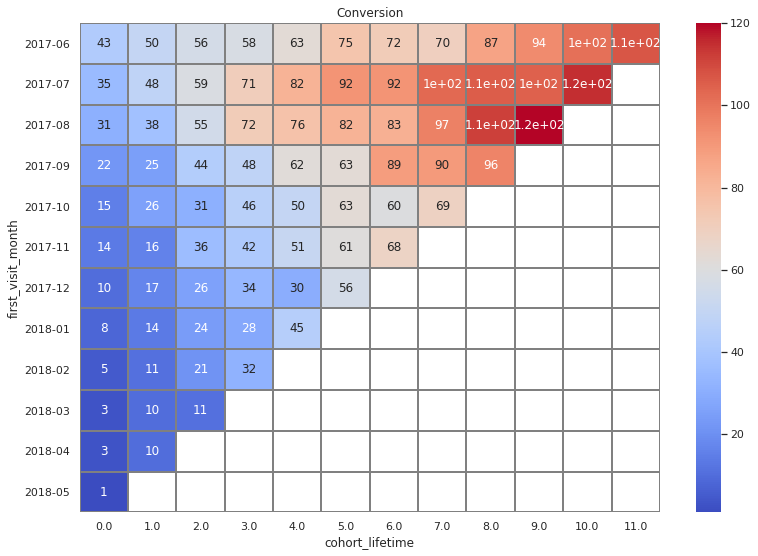

In [58]:
orders_pivot.index = orders_pivot.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Conversion')
sns.heatmap(
    orders_pivot, annot=True, linewidths=1, linecolor='gray', cmap= 'coolwarm'
)

From cohort to cohort users began to buy faster and faster - the conversion tends to decrease.

In [59]:
# the reviewer's cell:
maded_orders.time_to_first_order.describe()

count    97394.000000
mean        33.713750
std         63.348208
min          0.000000
25%          0.000000
50%          1.000000
75%         37.000000
max        363.000000
Name: time_to_first_order, dtype: float64

**Next step is to find out how many orders do people make during a given period of time.**

In [60]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

In [61]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Let's build cohorts. We'll add users' first-purchase months to the table of orders:

In [62]:
orders= pd.merge(orders,first_orders, on='uid')
orders.head()

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01


In [63]:
orders['cohort_lifetime'] = (
    orders['order_month'] - orders['first_order_month']
)
orders['cohort_lifetime'] = orders[
    'cohort_lifetime'
] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round()

In [64]:
cohort_piv = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique',
) 
cohort_piv.round(2).fillna('')

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0
2017-07-01,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,
2017-08-01,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,,
2017-09-01,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,,,
2017-10-01,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,,,,
2017-11-01,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,,,,,
2017-12-01,4383.0,146.0,103.0,97.0,50.0,63.0,,,,,,
2018-01-01,3373.0,114.0,83.0,43.0,45.0,,,,,,,
2018-02-01,3651.0,118.0,58.0,39.0,,,,,,,,


It seems that users make a lot orders at the beginning but then stop doing it - there is a lot of one-purchase users.

**What is the average purchase size?**

In [65]:
cohort_avr = orders.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='revenue',
    aggfunc='mean',
) 
cohort_avr.round(2).fillna('')

cohort_lifetime,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


<AxesSubplot:title={'center':'Cohorts: Orders amount'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

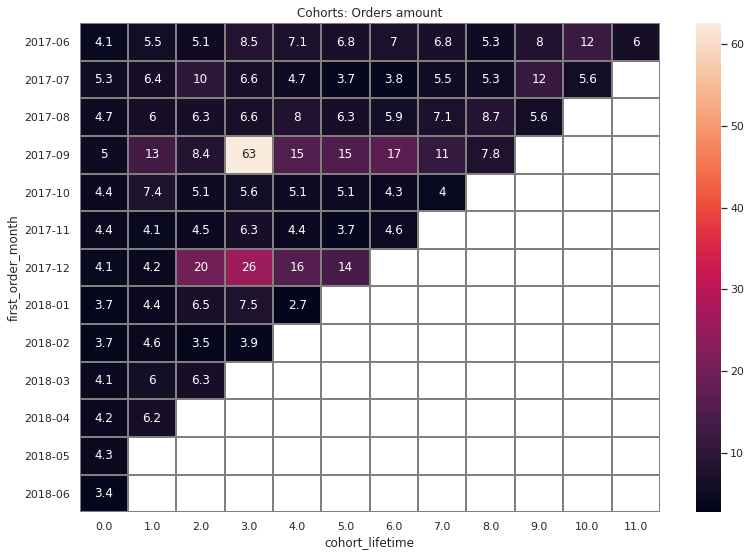

In [66]:
cohort_avr.index = cohort_avr.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Orders amount')
sns.heatmap(
    cohort_avr, annot=True, linewidths=1, linecolor='gray'
) 


Fourth and sevents cohorts have the largest average purchase sizes (with the biggest amount equal to 63 which is in line with a visits jump at the end of November 2017).

**How much money do people bring? (LTV)**

Let's calculate the number of new users (n_users) for each month:


In [67]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_users']
cohort_sizes.head() 

,first_order_month,n_users
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [68]:
# Grouping the table of orders by month of first purchase and month of purchase and sum up the revenue
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Let's add data on how many users made their first purchases in each month to the cohorts table:

In [69]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_users,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [70]:
# Making the columns show the cohort's age instead of the month of the order.
# We have no data about profitability - let's assume that average margin is 100%

In [71]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_users,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Now we can finally calculate LTV:

In [72]:
report['ltv'] = report['revenue'] / report['n_users']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis = 1)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


<AxesSubplot:title={'center':'LTV'}, xlabel='age', ylabel='first_order_month'>

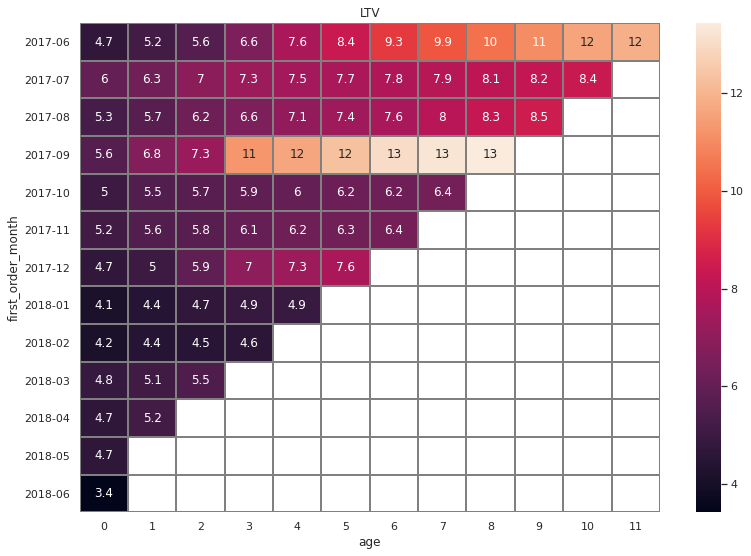

In [73]:
output.index = output.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(
    output, annot=True, linewidths=1, linecolor='gray'
) 

For example we can find the LTV of the first cohort by adding up the value for each month:

In [74]:
ltv_201706 = output.loc['2017-06'].sum()
ltv_201706

102.3689520514088

On average, each customer from the first cohort brought 102 units in revenue over their one year liftetime.

**Intermediate conclusions**

We have perfprmed cohort analysis for orders made during the year. The most successfull in terms of amount of orders are cohorts number 4,5,6,7. But the general tendency is a lot of orders at the beginning with a huge decrease on the next month.

In terms of purchase size the 4th and 7th cohorts have th largest averages.

The highest LTV metrics were calculated for 1st and 4th cohorts.

Until now the 4th cohort is the most successull basing on all metrics we have calculated.

# 2.3. Marketing

**How much money was spent? Overall/per source/over time**

In [75]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [76]:
# Overall costs:
total_costs = costs['costs'].sum()
print('Total costs for the year:', total_costs)

Total costs for the year: 329131.62


In [77]:
# Costs per source:
costs_per_source = costs.groupby(['source_id']).agg({'costs': 'sum'}).sort_values(by=['costs'], ascending=False).reset_index()
costs_per_source.head(10) 

,source_id,costs
0,3,141321.63
1,4,61073.60
2,5,51757.10
3,2,42806.04
4,1,20833.27
5,10,5822.49
6,9,5517.49


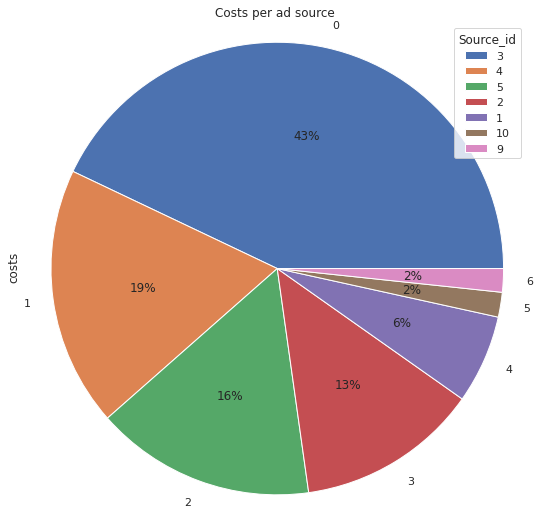

In [78]:
costs_per_source.plot(y = 'costs', kind='pie', autopct='%1.0f%%', figsize = (9,9))
plt.axis('equal')
plt.legend(labels = costs_per_source['source_id'], title='Source_id')
plt.title('Costs per ad source')
plt.show()

In [79]:
# Costs over time:
costs_per_dt = costs.groupby(['dt']).agg({'costs': 'sum'}).sort_values(by=['costs'], ascending=False).reset_index()
costs_per_dt.head() 

,dt,costs
0,2017-11-24,3458.86
1,2018-05-31,2153.70
2,2017-12-11,2121.13
3,2018-02-10,1981.39
4,2017-11-16,1811.02


Text(0.5, 1.0, 'Total costs per day')

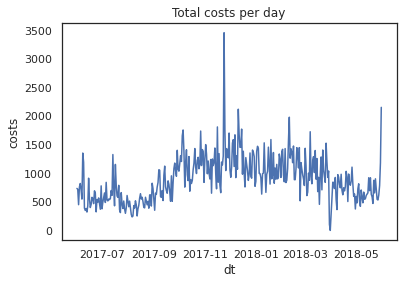

In [80]:
sns.lineplot(x=costs_per_dt.dt, y=costs_per_dt.costs)
plt.title('Total costs per day')

Let's also look at different ad source costs per week during the year (daily costs plot is not user-fiendly)

In [81]:
costs['cost_week'] = costs['dt'].astype('datetime64[W]')

In [82]:
costs_per_dt_per_source = costs.pivot_table(
    index='cost_week', columns='source_id', values='costs', aggfunc='sum'
)
costs_per_dt_per_source.head()

source_id,1,2,3,4,5,9,10
cost_week,,,,,,,
2017-06-01,367.04,790.61,2243.85,432.80,718.64,77.30,120.37
2017-06-08,264.55,421.99,1879.82,1109.56,629.22,61.63,60.75
2017-06-15,223.31,475.83,1681.21,834.99,582.13,66.90,68.72
2017-06-22,201.15,534.00,1480.93,895.29,533.87,58.81,49.09
2017-06-29,184.65,548.73,1666.33,670.49,547.84,62.62,62.37


Text(0, 0.5, 'Costs')

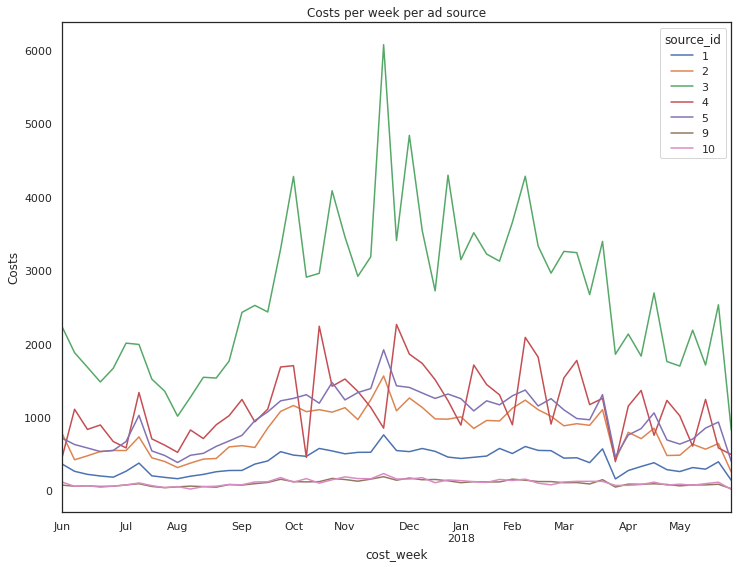

In [83]:
costs_per_dt_per_source.plot( figsize = (12,9))
plt.title('Costs per week per ad source')
plt.ylabel("Costs")

We can observe at the plot above similar lines for the most popular ad source in terms of amount of total costs spent. The less popular ones (9 and 10) are almost at the same level during the year.

If we compare costs plot by date with amount of visits graph we made at the beginning we'll see that ups and downs of visists are closely connected with amount of marketing expenses - it means that marketing campaigns are successful.

Let's look at the amount of visits connected with type of ad source the user came from:

In [84]:
# detecting first ad source attracted user for each user
first_channel = visits.sort_values('start_ts').drop_duplicates(['uid'], keep='first')
first_channel.head()

,device,end_ts,source_id,start_ts,uid,date_start_ts,visit_month,first_visit_date,visit_week,session_lenght,first_visit_month,cohort_lifetime
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017-06-01,2017-06-01,2017-06-01,2017-05-29,1.0,2017-06-01,0.0
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017-06-01,2017-06-01,2017-06-01,2017-05-29,0.0,2017-06-01,0.0
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017-06-01,2017-06-01,2017-06-01,2017-05-29,14.0,2017-06-01,0.0
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017-06-01,2017-06-01,2017-06-01,2017-05-29,0.0,2017-06-01,0.0
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-05-29,2.0,2017-06-01,0.0


In [85]:
users_count_by_source = first_channel.groupby('source_id').agg({'uid': 'nunique'}).sort_values(by=['uid'], ascending=False).reset_index()
users_count_by_source.head(10)

,source_id,uid
0,4,72346
1,3,66116
2,5,49237
3,2,17616
4,1,9469
5,10,6903
6,9,6448
7,7,32
8,6,2


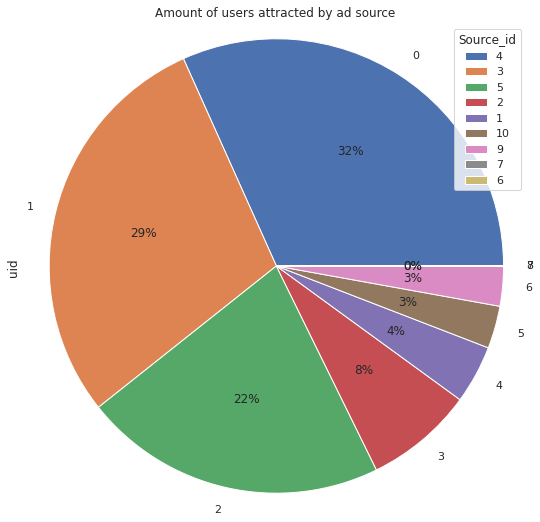

In [86]:
users_count_by_source.plot(y = 'uid', kind='pie', autopct='%1.0f%%', figsize = (9,9))
plt.axis('equal')
plt.legend(labels = users_count_by_source['source_id'], title='Source_id')
plt.title('Amount of users attracted by ad source')
plt.show()

There is a similar distribution of ad source for visits and costs. The top ad source with the largest amount of costs is '3' while the most amount of visits are attracted by '4' ad source.  

**How much did customer acquisition from each of the sources cost?**

In [87]:
# calculating the costs per ad source
costs_by_source = costs.groupby('source_id').sum().reset_index()
costs_by_source.head(7)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [88]:
# merging of total costs with amount of users attracted by each ad source
acqisition_costs = pd.merge(costs_by_source, users_count_by_source, on='source_id')
acqisition_costs.head(7)

,source_id,costs,uid
0,1,20833.27,9469
1,2,42806.04,17616
2,3,141321.63,66116
3,4,61073.60,72346
4,5,51757.10,49237
5,9,5517.49,6448
6,10,5822.49,6903


In [89]:
#CAC by ad source calculation
acqisition_costs['cac_by_source'] = acqisition_costs['costs'] / acqisition_costs['uid']
acqisition_costs = acqisition_costs.sort_values('cac_by_source', ascending=False)
acqisition_costs.head(7)

,source_id,costs,uid,cac_by_source
1,2,42806.04,17616,2.429952
0,1,20833.27,9469,2.200155
2,3,141321.63,66116,2.137480
4,5,51757.10,49237,1.051183
5,9,5517.49,6448,0.855690
3,4,61073.60,72346,0.844188
6,10,5822.49,6903,0.843472


1st and 2d sources are the most expensive. 4th one is the most effective and almost the most cheap ad source. 3d one is expensive but also the most popular after the 4th ad source.

In [90]:
# calculating the costs per month
costs['month'] = costs['dt'].astype('datetime64[M]') 
monthly_costs = costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [91]:
report = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report['cac'] = report['costs'] / report['n_users']
report.head()

,first_order_month,n_users,order_month,revenue,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,1020,18015.0,8.905091


**Intermediate conclusions**

The most expensive in terms of total money spent is 3d ad source. From the other hand it's not the most popular in terms of new customers attraction (the 4th source is).

CAC analysis by ad source shows that 1st and 2d sources are the most expensive. Before making conclusions about them we will look at revenue earned from users attracted by these sources. 4th is the most effective and almost the most cheap ad source. 3d one is expensive but also the most popular after the 4th ad source.

**How worthwhile were the investments? (ROI)**

In [92]:
report['romi'] = report['ltv'] / report['cac']
output = report.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
).cumsum(axis=1).round(2)

output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


<AxesSubplot:title={'center':'ROI'}, xlabel='age', ylabel='first_order_month'>

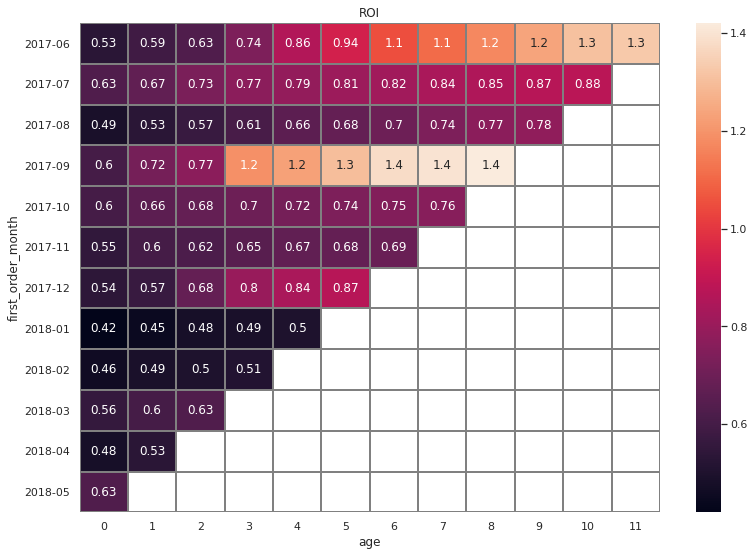

In [93]:
output.index = output.index.strftime('%Y-%m')
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROI')
sns.heatmap(
    output, annot=True, linewidths=1, linecolor='gray'
)

It seems that costs not covered by revenue received only for 1st and 4th cohorts. There could be a necessity to reсonsider the marketing policy.

Let's try to find out how quickly cohorts pay off on average. 

In [94]:
output.mean(axis=0)

age
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

On average, cohorts pay off toward the 8-10th month.

Let's calculate ROMI for each source:

In [95]:
orders.head()

,buy_ts,revenue,uid,order_month,first_order_month,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01,2017-06-01,0.0
1,2017-06-01,0.55,11627257723692907447,2017-06-01,2017-06-01,0.0
2,2017-06-01,0.37,17903680561304213844,2017-06-01,2017-06-01,0.0
3,2017-06-01,0.55,16109239769442553005,2017-06-01,2017-06-01,0.0
4,2017-06-01,0.37,14200605875248379450,2017-06-01,2017-06-01,0.0


In [96]:
orders_by_source = pd.merge(orders, first_channel, on='uid')

In [97]:
orders_ltv = orders_by_source[['revenue','source_id']]
orders_ltv = orders_ltv.groupby(['source_id']).sum().reset_index()
orders_ltv

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [98]:
orders_ltv = pd.merge(orders_ltv, costs_by_source, on = 'source_id')
orders_ltv = pd.merge(orders_ltv, users_count_by_source, on = 'source_id')

In [99]:
orders_ltv['ltv'] = orders_ltv['revenue']/orders_ltv['uid']
orders_ltv['cac'] = orders_ltv['costs' ]/orders_ltv['uid']
orders_ltv['romi'] = orders_ltv['ltv' ]/orders_ltv['cac']
orders_ltv = orders_ltv.sort_values('romi', ascending=False)
orders_ltv

,source_id,revenue,costs,uid,ltv,cac,romi
0,1,31090.55,20833.27,9469,3.283404,2.200155,1.492351
1,2,46923.61,42806.04,17616,2.663693,2.429952,1.096191
5,9,5759.40,5517.49,6448,0.893207,0.855690,1.043844
4,5,52624.02,51757.10,49237,1.068790,1.051183,1.016750
3,4,56696.83,61073.60,72346,0.783690,0.844188,0.928336
6,10,4450.33,5822.49,6903,0.644695,0.843472,0.764335
2,3,54511.24,141321.63,66116,0.824479,2.137480,0.385725


We got interesing results here. Ad source number 3 didn't pay off during the year (in previous steps it was identified as one of the most popular ad sources). Ad source number 4 has ROMI = 0.92 which is not so bad but also could be better.

1st and 2d ad sources have the highest ROMI - may be it make sense to concentrate on them and reduce costs spent on ad source number 3. 

## Write a conclusion: advise marketing experts how much money to invest and where

Taking into account the values of KPIs calculated it seems that the business is not as healthy as it could be. 

From the one hand, the amount of visits and orders made are in line with costs spent (we can see it at the corresponding plots.) The conversion tends to decrease from cohort to cohort. People begin to buy faster from month to month.

From the other hand, the retention rate is quite small (7.9% is the highest value). Users tend to make a lot of orders at the beginning with a huge decrease of orders amount in subsequent periods(more than 20 times decrease).

ROI index is acceptable only for 1st and 4th cohorts - it means that it takes a lot of time to pay off for all other cohorts (or may be they will not pay off at all).

In general desktops are more successful than touch - people visit Yandex.Afisha 3 times more often from desktop (721 and 266 are average amount of visits for desktop and touch respectively). So the good strategy is to concentrate on desktop applcation.

As about ad sources it seems that the biggest ones are 3 and 4, the most amount of visits has come from 4th source. But taking into account ROMI by ad source calculation we can conclude that ad source number 3 is not profitable at all - corresponding costs might have to be decreased significantly. On the other hand, 1st and 2d have the highest ROI - they are underastimated by the marketing department and should be invested in more. 4th ad source is also should be reconsidered - ROMI is almost equal to 1, may be corresponding costs should be also decreased or some other marketing strategy for it should be applied.

The most successfull cohorts are 1st and 4th one (they are paid off, they have the highest LTV - the highest revenue per one customer during their lifetime).

Overall it seems that the marketing strategy should be reconsidered in order to make users to come back more often (to increase retantion rate) and to make business more profitable.